<a href="https://colab.research.google.com/github/astrrr/test-classifier/blob/main/Santok_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd




In [2]:
img = image.load_img("/basedata/train/orange/0.jpg")

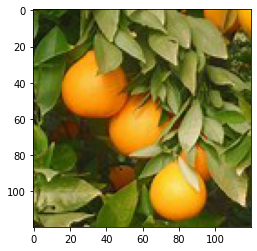

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("/basedata/train/orange/0.jpg").shape

(120, 120, 3)

In [5]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [6]:
train_dataset = train.flow_from_directory("/basedata/train",
                                          target_size=(200,200),
                                          batch_size = 3,
                                          class_mode ="binary")

validation_dataset = validation.flow_from_directory("/basedata/validation",
                                          target_size=(200,200),
                                          batch_size = 3,
                                          class_mode ="binary")

Found 1416 images belonging to 2 classes.
Found 355 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'grapefruit': 0, 'orange': 1}

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation= 'relu', input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation= 'relu', input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation= 'relu', input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')

                                    ])

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics =['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch =3,
                      epochs = 256,
                      validation_data = validation_dataset)


Epoch 1/256
3/3 [==============================] - 9s 4s/step - loss: 10.7897 - accuracy: 0.3333 - val_loss: 2.0648 - val_accuracy: 0.2620
Epoch 2/256
3/3 [==============================] - 7s 3s/step - loss: 2.6199 - accuracy: 0.5556 - val_loss: 1.1524 - val_accuracy: 0.2620
Epoch 3/256
3/3 [==============================] - 7s 4s/step - loss: 1.0646 - accuracy: 0.3333 - val_loss: 0.6926 - val_accuracy: 0.5577
Epoch 4/256
3/3 [==============================] - 7s 3s/step - loss: 0.6821 - accuracy: 0.5556 - val_loss: 0.6179 - val_accuracy: 0.7408
Epoch 5/256
3/3 [==============================] - 8s 4s/step - loss: 0.7239 - accuracy: 0.7778 - val_loss: 0.6260 - val_accuracy: 0.7239
Epoch 6/256
3/3 [==============================] - 8s 4s/step - loss: 0.6440 - accuracy: 0.6667 - val_loss: 0.6362 - val_accuracy: 0.7268
Epoch 7/256
3/3 [==============================] - 7s 4s/step - loss: 0.8307 - accuracy: 0.4444 - val_loss: 0.7626 - val_accuracy: 0.3915
Epoch 8/256
3/3 [================

In [ ]:
dir_path = '/basedata/test'
for i in os.listdir(dir_path):
    img = tf.keras.preprocessing.image.load_img(dir_path+'//'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()

    X= tf.keras.preprocessing.image.img_to_array(img)
    X= np.expand_dims(X,axis=0)
    image = np.vstack([X])
    val = model.predict(image)

    #print(val)

    if val ==0:
      print('This is Grapefruit : '+i)
      print('************************************************')
    else:
      print('This is Orange : '+i)
      print('************************************************')
    